# ML Basic: Linear Regression буюу Шугаман регресс

* Жишээ      :   Их Сургуульд тэнцэх магадлалыг тооцох 🎓
* Гүйцэтгэсэн:     Я.Баярцогт (Дэнцү Дата Артист Монгол ХХК 😎)
* Он:      2020 😷

### Агуулга:
1. [Бэлтгэл ажил](#Бэлтгэл-Ажил) 🙇
2. [Сургалт](#Одоо-сургалтын-бэлтгэлрүүгээ-оръё) 🤖
3. [Шалгаж үзэх (Тоглох)](#Шалгаж-үзэх) 👀
4. [Хэрэглэгдсэн материалууд](#Хэрэглэгдсэн-материалууд:) 🙏🏻

Хэрэглэгдэх сангуудыг суулгах
Хэрвээ танд хэрэглэгдэж буй сангууд байхгүй бол доорх мөрийг ажиллуулснаар сангууд суух болно.
```
! pip install numpy pandas matplotlib
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/Admission_Predict.csv')
print(df.shape)
df.head()

(400, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Бэлтгэл Ажил
Ойлгоход илүү амар болгохын тулд зөвхөн **НЭГ** feature сонгоод тэндээсээ тэнцэх эсэхээ таамаглах гээд оролдъё.

In [3]:
cols_to_use    = ['TOEFL Score']         # Энэ баганыг оролт байдлаар ашиглана.
col_to_predict = 'Chance of Admit '      # Энэ баганыг таах гэж оролдоно.

### Бидний зорилго бол:

1. TOEFL оноог ашиглан сургууль тэнцэх магадлалаа таамаглах
2. **Хамгийн чухал нь** машин хэрхэн сурдгийг энгийнээр ойлгох
   
   
   X => [манай модель] => Y

In [4]:
X = df[cols_to_use]        # Оролт
Y = df[col_to_predict]     # Хүлээгдэж буй гаралт

In [5]:
# Оролт (Input) => X
X.head(2)

,TOEFL Score
0,118
1,107


In [6]:
# Зөв гаралт (Ground Truth) - Y 
Y.head(2)

0    0.92
1    0.76
Name: Chance of Admit , dtype: float64

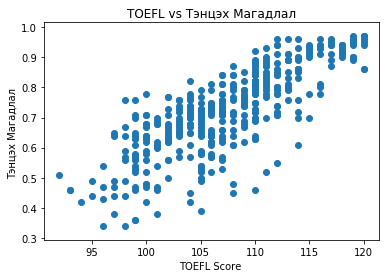

In [7]:
plt.scatter(X, Y)
plt.title('TOEFL vs Тэнцэх Магадлал')
plt.xlabel('TOEFL Score ')
plt.ylabel('Тэнцэх Магадлал ')
plt.show()

In [8]:
n_of_data     = X.shape[0]
n_of_features = X.shape[1]

print("Манай case дээр нийт %i мөр дата %i ширхэг feature байна." % (n_of_data, n_of_features))

Манай case дээр нийт 400 мөр дата 1 ширхэг feature байна.


Машин сургалтад feature normalization тооцоллыг илүү хурдасгахад чухал үүрэгтэй байдаг. 

Өөрөөр хэлбэл, TOEFL 118 оноотой хүн тэнцэх магадлал өндөр буюу 0.92 гэж бодсоноос илүү TOEFL дээр 93.3 (118/120) хувийн гйүцэтгэлтэй байгаа юм чинь тэнцэх магадлал их юм байна гэж бодсон нь тооцоход хамаагүй хялбар.

Мэдээж маш олон төрлийн техникүүд байгаа ба тухайн нөхцөл байдлаас шалтгаалан алийг нь хэрэглэхээ шийддэг. [Normalization (statistics)](https://en.wikipedia.org/wiki/Normalization_(statistics))

In [9]:
def fit_normalize(X):
    mean = X.mean()                # дундаж
    std = X.std()                  # стандарт хазайлт
    
    def normalizer(X):         
        X_norm = (X - mean) / std  # дундажийг нь хасаад стандарт хазайлтад нь хуваах үйлдэл
        return X_norm
    
    def denormalizer(X_norm):      # Дараа нь ямар зурж харахад амар гэдэг зорилгоор урвуу үйлдэл хийх функц
        X_denorm = X_norm * np.array(std) + np.array(mean)
        return X_denorm

    return  normalizer, denormalizer

In [10]:
# Normalize хийх
normalizer, denormalizer = fit_normalize(X)
X_norm = normalizer(X)
X_norm['bias'] = 1
X_norm.head(2)

,TOEFL Score,bias
0,1.744786,1
1,-0.067551,1


## Одоо сургалтын бэлтгэлрүүгээ оръё

Дараах үйлдлийг олон давтана (for-доно :D)
1. **Forward Pass** буюу таамаглал хийх
2. **Compute Loss** буюу таамагласан үр дүн ба жинхэнэ үр дүн хоёрын хоорондох алдааг тооцох
3. **Compute Gradient** буюу тухайн мөч дэх Weight-матриксийн утгаар Градьент тооцох (Дараа нь Weight Matrix өөрчлөхөд ашиглана)
4. **Update Weight** буюу гаргасан градьент-аараа Weight-ээ update хийнэ

Таамаглал хийх:

$ Ypred_i = X_{i} * W + B_{i} $

In [11]:
def forward_pass(X_norm_, Weight):
    prediction = np.dot(X_norm_, Weight)
    
    return prediction


Алдаа тооцох функц:

$ Mean Squared Error = \frac{\sum({Ypred_{i} - Y_{i}})^{2}}{2n} 
                     = \frac{\sum({(X_{i} * W + B) - Y_{i}})^{2}}{2n}  $


In [12]:
def compute_loss(Y, Y_predict): # (400, 1),  (400, 1)
    loss = np.sum(np.power(Y_predict - Y, 2)) / (2 * n_of_data)

    return loss

Градьент тооцох функц:

$Gradient  = \frac{d\frac{\sum({(X_{i} * W + B) - Y_{i}})^{2}}{2n}}{dW}
           = \frac{\sum({(X_{i} * W + B) - Y_{i}) * X_{i}}}{n}  $

In [13]:
# Gradient тооцох функц
def compute_gradient(Y, Y_predict, X_norm_): # (400, 1),  (400, 1), (400, nfeatures)
    grad = np.dot(X_norm_.T, (Y_predict - Y)) / n_of_data

    return grad

In [14]:
# Явцын дунд хэр сайн шулуун татаж байгааг харах функц
def create_plot(X_norm_, Weight, Y):
    # Forward Pass буюу таамаглал хийх
    prediction = np.dot(X_norm_, Weight)
    
    # Плот үүсгэх
    plt.scatter(denormalizer(X_norm_[:, 0]), Y, label='Жинхэнэ утга')
    plt.plot(denormalizer(X_norm_[:, 0]), prediction, 'r', label='Таамаглал утга')
    plt.xlabel('TOEFL Normalized')
    plt.ylabel('Тэнцэх Магадлал')
    plt.legend()
    plt.show()

Одоо тооцооллын хялбарчлахын тулд pandas. object оо numpy object болгоё

In [15]:
X_norm_   = X_norm.to_numpy()                 # (400, nfeatures)
Y_        = Y.to_numpy().reshape(-1, 1)       # (400, 1)

# reshape(-1, 1) үйлдэл:  
# Анх "Y" маань (400,) байгааг (400, 1) болгоно. Энэ нь дараа нэмэх хасах үйлдэл хийх үед алдаа гаргахгүй байлгах зорилготой юм.

In [16]:
np.random.seed(42)

LEARNING_RATE = 1e-4
EPOCHS        = 40000

expected_output = 1

In [17]:
loss_history = []

# Манай тохиолдолд хэлбэр нь: (1, 1)
Weight = np.random.rand(X_norm_.shape[1]).reshape(X_norm_.shape[1], expected_output) 

EPOCH  0 => LOSS  0.063553 


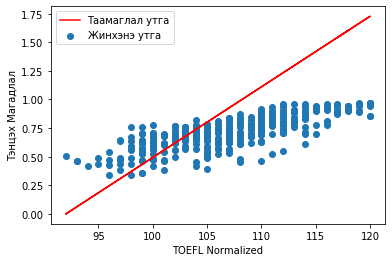

EPOCH  8000 => LOSS  0.015880 


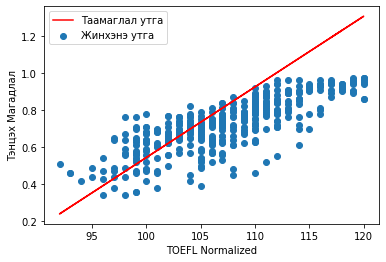

EPOCH  16000 => LOSS  0.006234 


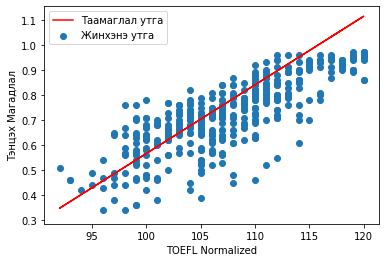

EPOCH  24000 => LOSS  0.004282 


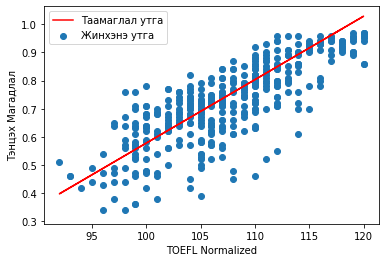

EPOCH  32000 => LOSS  0.003887 


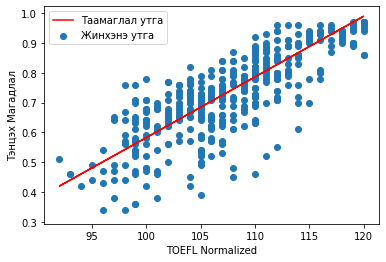

In [18]:
for epoch in range(EPOCHS):
    # Forward Pass буюу таамаглал хийх
    Y_predict = forward_pass(X_norm_, Weight)       # (400, nfeatures) x (2, nfeatures) = (400, 1)

    # Compute Loss буюу таамагласан үр дүн ба жинхэнэ үр дүн хоёрын хоорондох алдааг тооцох
    loss = compute_loss(Y_, Y_predict)

    # Compute Gradient буюу тухайн мөч дэх Weight-матриксийн утгаар Градьент тооцох (Дараа нь Weight Matrix өөрчлөхөд ашиглана)
    gradient = compute_gradient(Y_, Y_predict, X_norm_)
    
    # Update Weight буюу гаргасан градьент-аараа Weight-ээ update хийнэ
    Weight = Weight - LEARNING_RATE * gradient
    
    
    loss_history.append(loss)
    
    if epoch % (EPOCHS // 5) == 0:
        print("EPOCH  %i => LOSS  %f " % (epoch, loss))
        create_plot(X_norm_, Weight, Y) if X_norm_.shape[1] <= 2 else None

### Алдааны history-г зурж харъя

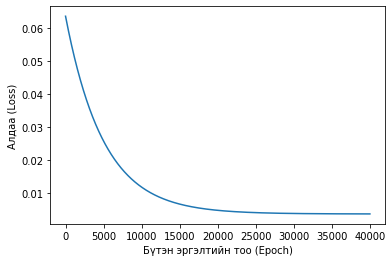

In [19]:
plt.plot(loss_history)
plt.xlabel("Бүтэн эргэлтийн тоо (Epoch)")
plt.ylabel("Алдаа (Loss)")
plt.show()

## Шалгаж үзэх

In [20]:
YOUR_TOEFL_SCORE = 95

In [21]:
your_df = pd.DataFrame({'TOEFL Score': [YOUR_TOEFL_SCORE]})

# 1. Нормалчлах
your_score_norm = normalizer(your_df)

# 2. Bias нэмэх
your_score_norm['bias'] = 1

# 3.Numpy array болгох
your_score_norm   = your_score_norm.to_numpy()

# 2. forward_pass буюу таамаглал хийх
your_score_norm = forward_pass(your_score_norm, Weight)

print("    TOEFL оноо : ", YOUR_TOEFL_SCORE)
print("Тэнцэх магадлал: ", your_score_norm.item())

    TOEFL оноо :  95
Тэнцэх магадлал:  0.4877828181356869


## Хэрэглэгдсэн материалууд:
1. [Mohan S Acharya - Graduate Admissions 2.0 Dataset](https://www.kaggle.com/mohansacharya/graduate-admissions)
2. [Normalization (statistics)](https://en.wikipedia.org/wiki/Normalization_(statistics))
3. [Great Emojis](https://getemoji.com)
4. [Andrew Ng - Machine Learning Coursera (Best ML course for ME)](https://www.coursera.org/learn/machine-learning?)

<br>
<br>
<br>
<br>
<br>


<h1 style="text-align:center;">Анхаарал тавьсан баярлалаа! 🙏🏻</h1>

|contact|url|
|--|--|
|E-mail  |mailto:bayartsogt@mn.data-artist.com|
|Github  |https://github.com/bayartsogt-ya|
|Website |https://bayartsogt-ya.github.io|
|LinkedIn|https://www.linkedin.com/in/bayartsogt-yadamsuren-b419b217b/|